# Мат. ожидание, дисперсия, ковариация, моменты

<strong>Математическое ожидание (начальный момент)</strong> - среднее значение случайной величины, обозначается как $E{\xi}$

Пример 1: <i>дискретный случай</i> (брошенная кость):

| i индекс               |  0  |  1  |  2  |  3  |  4  |  5  |
| ---------------------- | --- | --- | --- | --- | --- | --- |
| Xi случайная величина  |  1  |  2  |  3  |  4  |  5  |  6  |
| Pi вероятность         | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

$E{\xi} = P₁*X₁ + P₂*X₂ + P₃*X₃ + P₄*X₄ + P₅*X₅ + P₆*X₆$

Формула:

$E{\xi}=\sum {x}^{}_{i}*P(\xi={x}^{}_{i})$

Пример 2: <i>непрерывный случай</i>:

$E{\xi}=\int_{-∞}^∞ {x}^{}_{i}*dP(\xi={x}^{}_{i})$

<strong>Свойства мат. ожидания:</strong>

1. $E[c] = c$
2. Если ξ ≥ 0, то $E$<sub>ξ</sub> ≥ 0
3. Если P(ξ = 0) = 1, то $E$<sub>ξ</sub> = 0
4. Мат. ожидание линейно: $E[aX+bY] = a*E[X] + b*E[Y]$
5. Если случайные величины X, Y - независимы, то $E[X*Y] = E[X] * E[Y]$
6. Мат. ожидание сохраняет неравенства: X ≤ Y => $E[X] ≤ E[Y]$

<strong>Дисперсия (центральный момент)</strong> - мат. ожидание квадрата отклонения случайной величины от её математического ожидания или же $D[X] = E[(X - E[X])^2]$

<strong>Ковариация</strong> - мера зависимости двух случайных величин, 0 - случайные величины могут быть независимыми, но не обязаны, но если X, Y независимы, то $cov(X, Y) = 0$ 

<strong>Момент случайной величины</strong> - числовая характеристика распределения случайно величины.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
from collections import Counter
from collections import OrderedDict

%matplotlib inline

In [2]:
def draw(p, x_min, x_max, y_max, grid_size = 100, **kwargs):
    
    grid = np.linspace(x_min, x_max, grid_size)
    
    plt.figure(figsize = (14, 5))
    plt.plot(grid, p(grid, **kwargs), lw = 3)
    plt.grid(ls = ':')
    plt.xlim((x_min, x_max))
    plt.ylim((None, y_max))
    plt.show()

<strong>Плотность распределения</strong> это первая производная функции распределения случайной величины.
Площадь между осью значений случайных величин и кривой плотности распределения равна <i>единице</i>.


<strong>Плотность нормального распределения</strong>

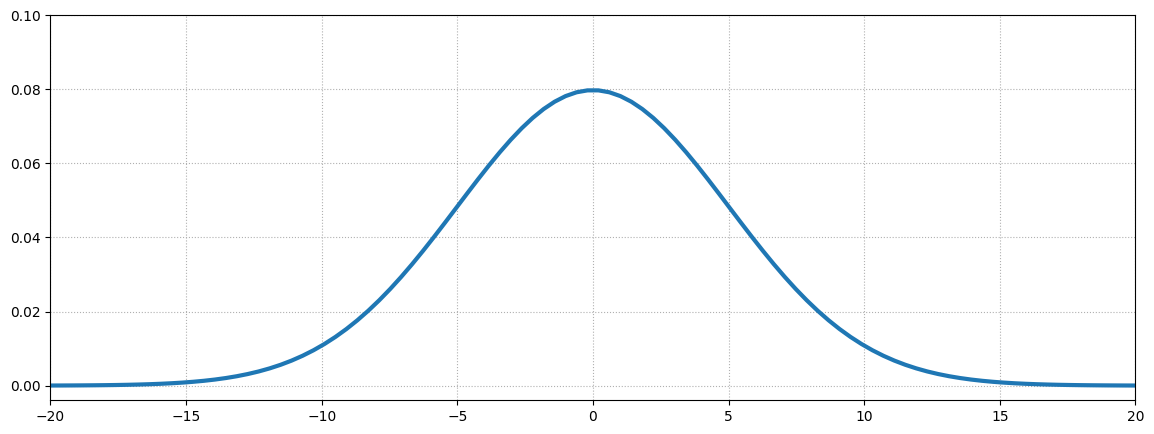

In [3]:
draw(sps.norm.pdf, -20, 20, 0.1, scale=5.0)

<strong>Плотность равномерного распределения<strong>

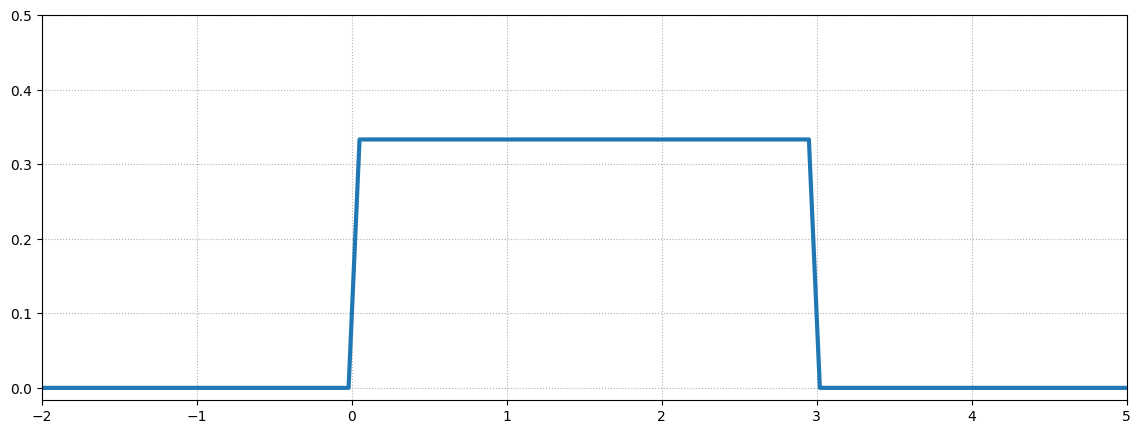

In [4]:
draw(sps.uniform.pdf, -2, 5, 0.5, scale = 3)

<strong>Плотность экспоненциального распределения<strong>

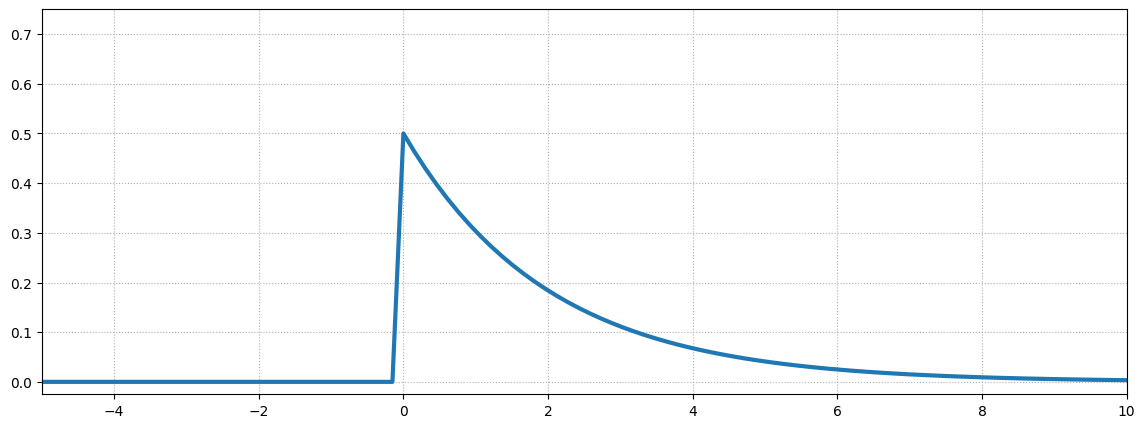

In [5]:
draw(sps.expon.pdf, -5, 10, 0.75, scale = 2)

## Плотность биномиального распределения (дискретное)

Биномиальное распределение - распределение количества «успехов» в последовательности из 
N независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p. Где $p$ - вероятность одного благоприятного события, а $p - 1$ вероятность одного неудачного эксперимента.

Пример: независимо подбрасываем N монет, может выпасть исключительно одно из следующих событий { 'Орел', 'Решка' }. Нас интересует количество событий { 'Орел' } из всех проведенных экспериментов.

In [6]:
Ω = [ 'Орел', 'Решка' ] # множество элементарных событий
A = [ 'Орел' ] # благоприятное событие

N = 100 # количество экспериментов
P = len(A) / len(Ω) # вероятность события { 'Орел' }

#### Искусственный пример

In [7]:
def experimental(count, color = 'yellow'):
    binomial = {}

    for i in range(N):
        binomial[i] = sps.binom.pmf(i, N, P)

    plt.plot(*zip(*sorted(binomial.items())), color = color)
    plt.bar(binomial.keys(), binomial.values())

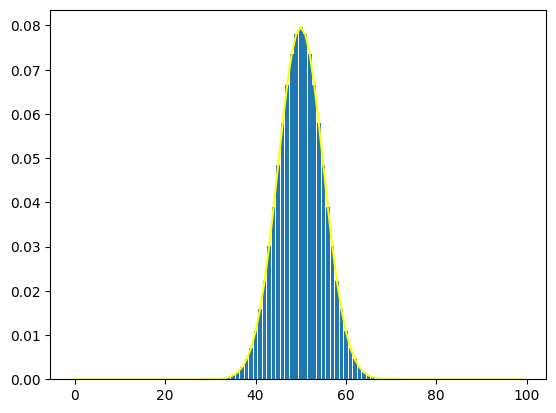

In [8]:
experimental(N)
plt.show()

#### Практический пример

In [9]:
def practical(count):
    values = []

    for i in range(count):
        value = random.choices(Ω, k = N).count(A[0])
        values.append(value)
    
    bins = np.linspace(min(values), max(values), num = N)
    
    counter = Counter(np.digitize(values, bins))
    oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

    counts = np.array(list(oredered.values()))
    
    return oredered.keys(), counts

def add_graph(count, color):
    
    probabilities, values_total = practical(count)
        
    plt.plot(probabilities, values_total / sum(values_total), color = color)
    
    return probabilities, values_total


Покажем на одном графике искусственный и практические примеры. 

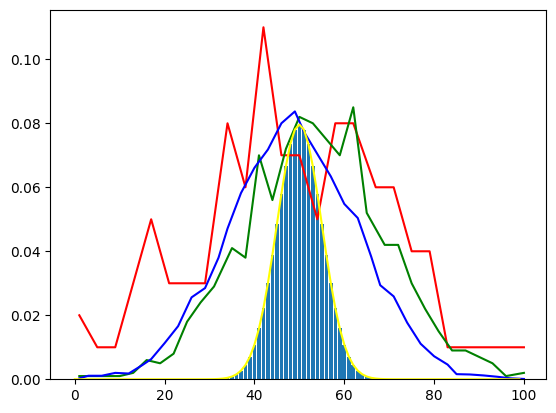

In [10]:
add_graph(N, color = 'red')
add_graph(N * 10, color = 'green')
add_graph(N * 100, color = 'blue')
experimental(N)

plt.show()

Как мы видим, чем больше выборка в практическом варианте, тем ближе она к теоретическому примеру.

#### Биномиальный тест

Возьмем точку с максимальной вероятностью $M(X = max(P))$, и проведем биномиальный тест с этими величинами.

In [11]:
probabilities, values = practical(N * 1_000)

P = list(probabilities)

max_p = max(P)

sps.binomtest(values[P.index(max_p)], N, p = max_p / sum(P))

BinomTestResult(k=2, n=100, alternative='two-sided', statistic=0.02, pvalue=0.3350882422671976)

$p-value > 0.05$, а значит вероятность того, что в самый возможный вариант в нашем практическом распределении совпадет с искусственным высока.

#### Важная идея (<a href="https://habr.com/ru/articles/730936/">источник</a>)

Графики, которые мы получили очень похожи на нормальное распределение, по сути, биномиальное распределение это предельный случай нормального распределения.

Предположим, у нас есть последовательность испытаний Бернулли, каждое с вероятностью успеха p, и мы повторяем этот эксперимент n раз. Пусть X — количество успехов в n испытаниях. Тогда X  имеет биномиальное распределение с параметрами n, p. Функция массы вероятности X  определяется как:

\begin{equation} P(X=k) = \binom{n}{k}p^k(1-p)^{n-k} \end{equation}
Самая тяжелая часть — факториал. Давайте воспользуемся приближением Cтирлинга, чтобы вычислить факториалы быстрее:

\begin{equation} n! \approx n^n e^{-n} \sqrt{2\pi n}= \sqrt{2\pi n}(\frac{n}{e})^n \end{equation}
Подставив это в Биномиальный коэффициент мы получаем:

\begin{align} \frac{n!}{k!(n-k)!} \approx \frac{\sqrt{2\pi n}(\frac{n}{e})^n}{\sqrt{2\pi k}(\frac{k}{e})^k \sqrt{2\pi (n-k)}(\frac{n-k}{e})^{n-k}}   \end{align}
Это может выглядеть пугающе, но на самом деле это просто замена и некоторая перестановка терминов.

Подставляя это приближение в PMF Биномиального распределения, мы получаем:

\begin{align} P(X=k) = \binom{n}{k}p^k(1-p)^{n-k} \approx \frac{1}{\sqrt{2\pi n p (1-p)}} \cdot \exp\left(-\frac{(k-np)^2}{2np(1-p)}\right) \end{align}
Это функция плотности вероятности нормального распределения при $\mu = np$, и квадратом $\sigma^2 = np(1-p)$:

\begin{equation} f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) \end{equation}